<a href="https://colab.research.google.com/github/ferdinand-lanvino/commodity-predictor/blob/master/commodity_predictor_expolratory_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Setup** <a name="setup"></a>

Clone the dataset

In [1]:
# Clone commodity-predictor repo.
!git clone -l -s git://github.com/ferdinand-lanvino/commodity-predictor.git
%cd commodity-predictor
!ls

Cloning into 'commodity-predictor'...
remote: Enumerating objects: 243, done.
remote: Counting objects: 100% (243/243), done.
remote: Compressing objects: 100% (212/212), done.
remote: Total 243 (delta 73), reused 150 (delta 23), pack-reused 0
Receiving objects: 100% (243/243), 2.27 MiB | 13.52 MiB/s, done.
Resolving deltas: 100% (73/73), done.
/content/commodity-predictor
commodity_predictor_preprocessing.ipynb  Dataset
commodity_predictor_research.ipynb	 lstm
commodity-price-predictor.ipynb		 README.md
commodity_price_predictor_lstm.ipynb


Pull the updates if needed

In [2]:
!git pull

Already up to date.


In [21]:
#basic packages
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O
import datetime # manipulating date formats
import itertools

#visualization
import matplotlib.pylab as plt # basic plotting
import seaborn as sns # for prettier plots

#statistic
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 16, 9

In [4]:
# pd.set_option('display.max_rows', 2000)
#Importing dataset 
dataset = pd.read_csv('Dataset/Converted/commodity.csv')
dataset['tanggal'] = pd.to_datetime(dataset['tanggal'],format='%d/%m/%Y')
#Drop all NaN values
dataset = dataset.dropna(how='any',axis=0)
print(dataset)

              komoditas    tanggal    harga
0                 Beras 2016-07-25  10900.0
1                 Beras 2016-07-26  10950.0
2                 Beras 2016-07-27  10950.0
3                 Beras 2016-07-28  10950.0
4                 Beras 2016-07-29  10950.0
...                 ...        ...      ...
29327  Gula Pasir Lokal 2020-05-20  17500.0
29328  Gula Pasir Lokal 2020-05-26  17650.0
29329  Gula Pasir Lokal 2020-05-27  17650.0
29330  Gula Pasir Lokal 2020-05-28  17650.0
29331  Gula Pasir Lokal 2020-05-29  17650.0

[29242 rows x 3 columns]


In [5]:
dataset.describe()

,harga
count,29242.000000
mean,36336.729704
std,36899.133797
min,9000.000000
25%,12850.000000
50%,24000.000000
75%,39000.000000
max,160000.000000


In [20]:
monthly_data = dataset.groupby("komoditas").agg({'tanggal' : ['min', 'max'], 'harga' : ['min', 'max',"mean","median","std"]})
monthly_data

tanggal             ...     harga              
                                        min        max  ...    median           std
komoditas                                               ...                        
Bawang Merah                     2016-07-25 2020-05-29  ...   32250.0   7382.894804
Bawang Merah Ukuran Sedang       2016-07-25 2020-05-29  ...   32250.0   7382.894804
Bawang Putih                     2016-07-25 2020-05-29  ...   36750.0   8344.147082
Bawang Putih Ukuran Sedang       2016-07-25 2020-05-29  ...   36750.0   8344.147082
Beras                            2016-07-25 2020-05-29  ...   11600.0    374.656298
Beras Kualitas Bawah I           2016-07-25 2020-05-29  ...   10400.0    411.458700
Beras Kualitas Bawah II          2016-07-25 2020-05-29  ...    9600.0    436.665313
Beras Kualitas Medium I          2016-07-25 2020-05-29  ...   12500.0    630.993777
Beras Kualitas Medium II         2016-07-25 2020-05-29  ...   12400.0    651.853333
Beras Kualitas Super I           2016-07-25 2020-05-29  ...   12900.0    468.499488
Beras Kualitas Super II          2016-07-25 2020-05-29  ...   11750.0    364.453410
Cabai Merah                      2016-07-25 2020-05-29  ...   41900.0  14001.142118
Cabai Merah Besar                2016-07-25 2020-05-29  ...   43750.0  15466.866602
Cabai Merah Keriting             2016-07-25 2020-05-29  ...   40000.0  14164.397175
Cabai Rawit                      2016-07-25 2020-05-29  ...   43750.0  20668.223230
Cabai Rawit Hijau                2016-07-25 2020-05-29  ...   37500.0  15576.136480
Cabai Rawit Merah                2016-07-25 2020-05-29  ...   50000.0  27224.127609
Daging Ayam                      2016-07-25 2020-05-29  ...   34000.0   2816.678894
Daging Ayam Ras Segar            2016-07-25 2020-05-29  ...   34000.0   2816.678894
Daging Sapi                      2016-07-25 2020-05-29  ...  137500.0   2233.090073
Daging Sapi Kualitas I           2016-07-25 2020-05-29  ...  150000.0   4213.846497
Daging Sapi Kualitas II          2016-07-25 2020-05-29  ...  127500.0   2219.539417
Gula Pasir                       2016-07-25 2020-05-29  ...   13200.0   1289.955759
Gula Pasir Kualitas Premium      2016-07-25 2020-05-29  ...   13400.0   1382.354586
Gula Pasir Lokal                 2016-07-25 2020-05-29  ...   13000.0   1339.152286
Minyak Goreng                    2016-07-25 2020-05-29  ...   13300.0    477.888143
Minyak Goreng Curah              2016-07-25 2020-05-29  ...   12000.0    752.317169
Minyak Goreng Kemasan Bermerk I  2016-07-25 2020-05-29  ...   14000.0    363.709109
Minyak Goreng Kemasan Bermerk II 2016-07-25 2020-05-29  ...   13750.0    534.529533
Telur Ayam                       2016-07-25 2020-05-29  ...   23000.0   2362.428466
Telur Ayam Ras Segar             2016-07-25 2020-05-29  ...   23000.0   2362.428466

[31 rows x 7 columns]

In [31]:
def show_per_commodity(dataset):
  nama_komoditas = dataset.komoditas.unique()
  for km in nama_komoditas:
    #Get sub dataset per commodity type
    subdataset = dataset[dataset.komoditas==km]
    #Set index by tanggal (date)
    subdataset = subdataset[['tanggal','harga']].set_index('tanggal')
    #reindex
    subdataset.index = pd.DatetimeIndex(subdataset.index)
    plt.plot(subdataset)
    plt.title('Harga '+km+" Juli 2016- Mei 2020")
    plt.xlabel('Waktu')
    plt.ylabel('Harga')
    plt.show()


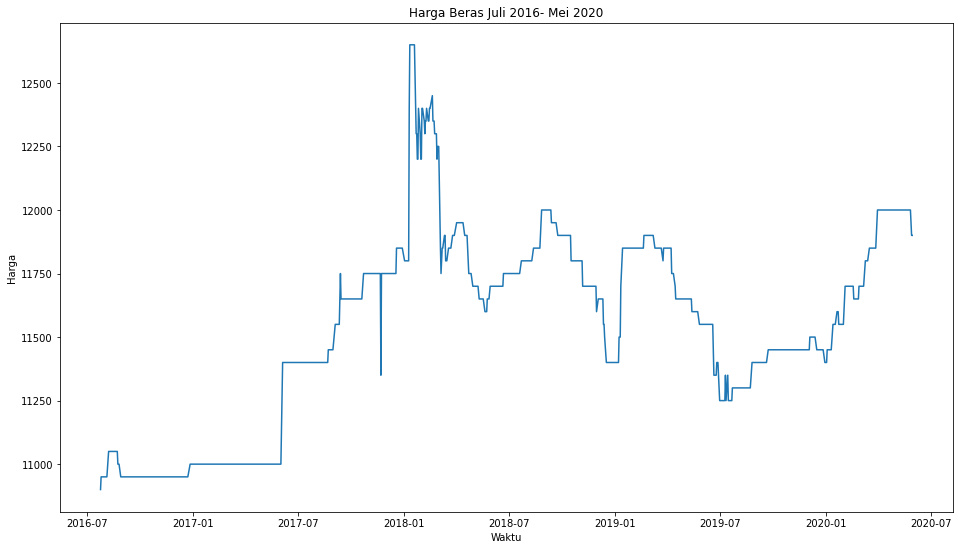

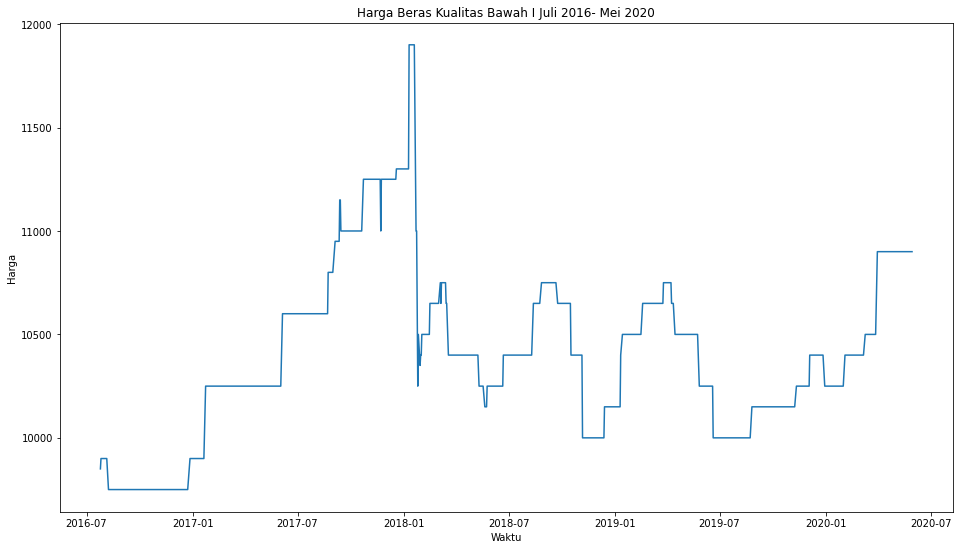

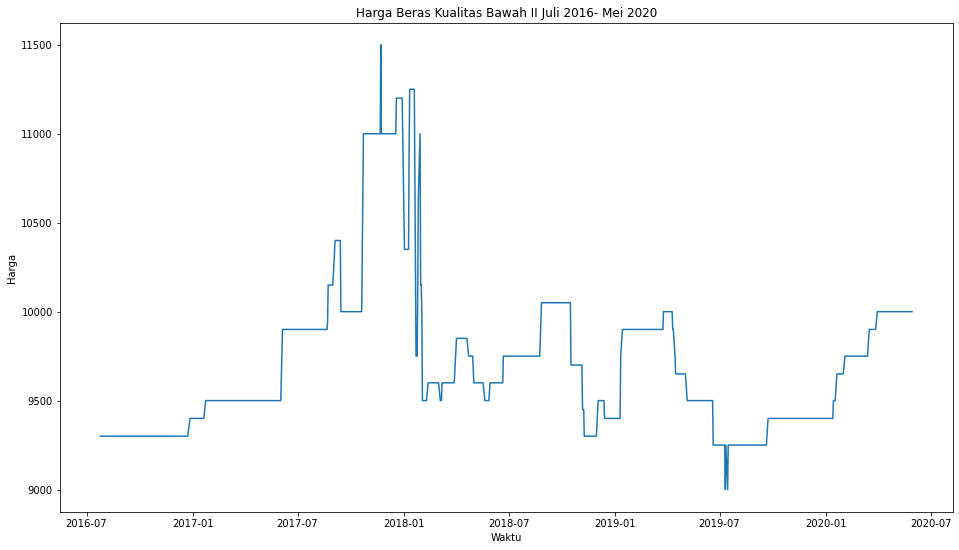

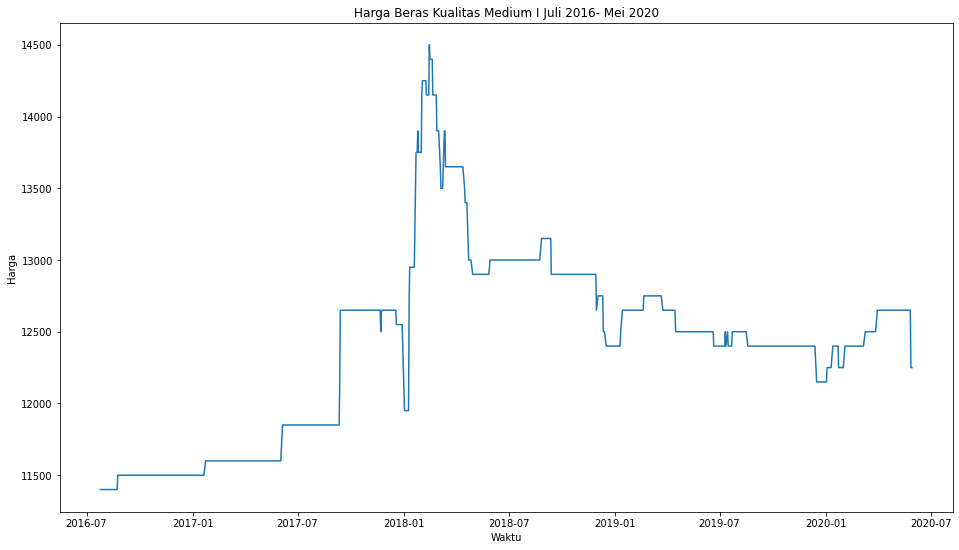

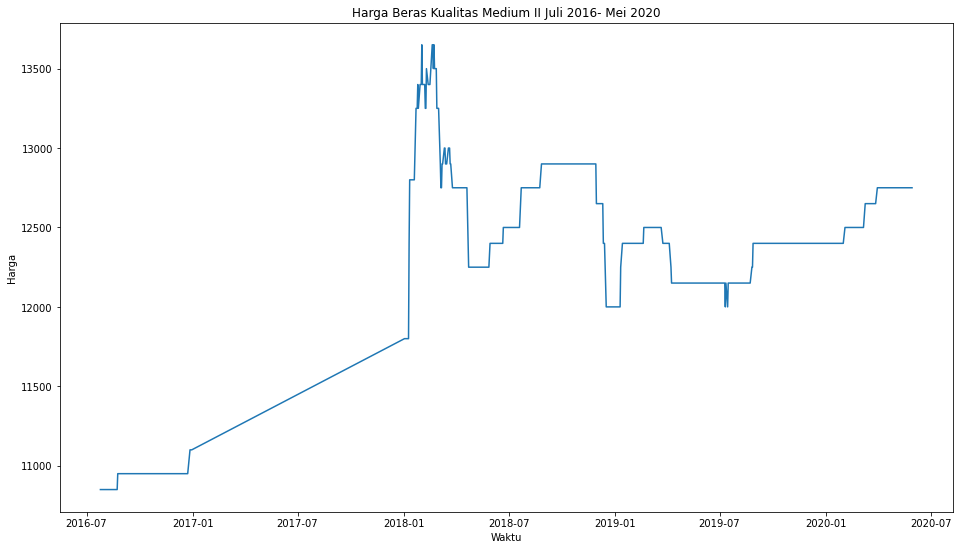

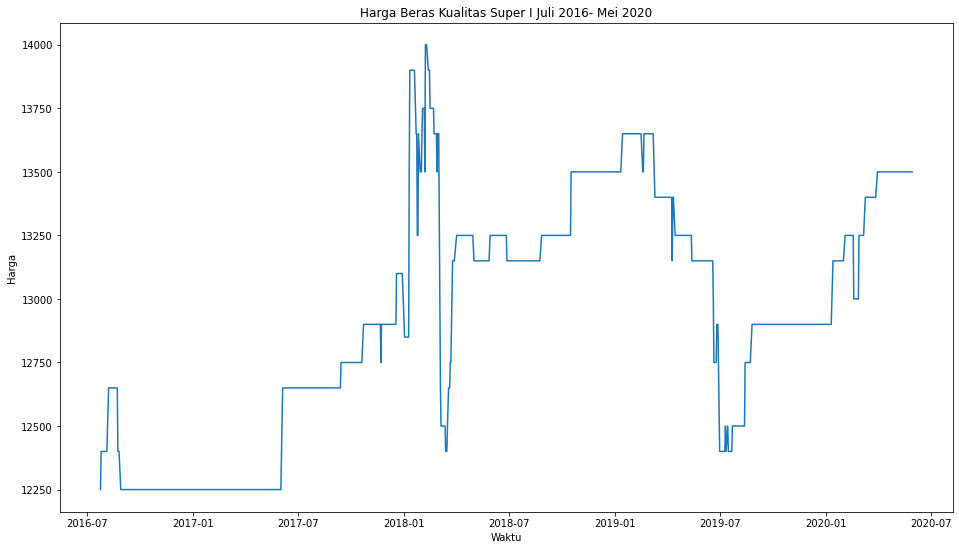

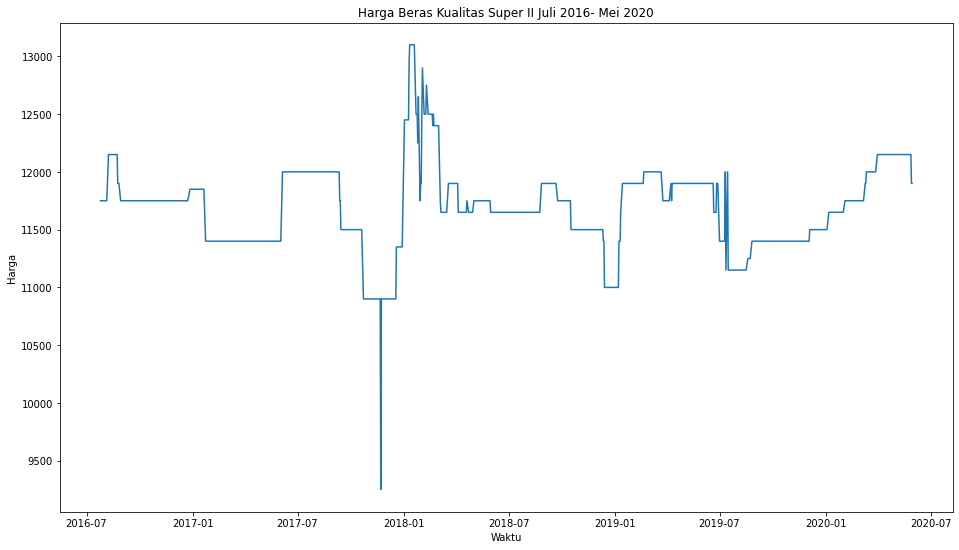

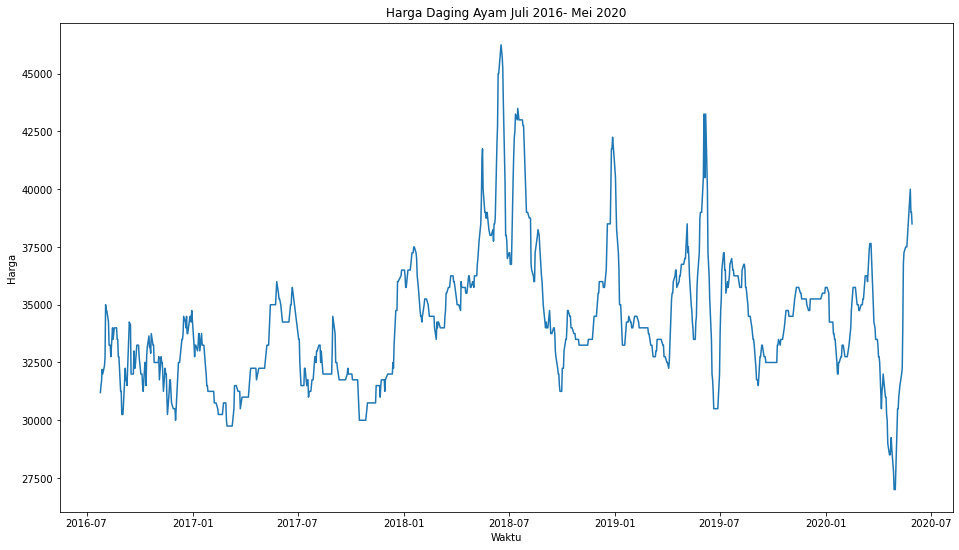

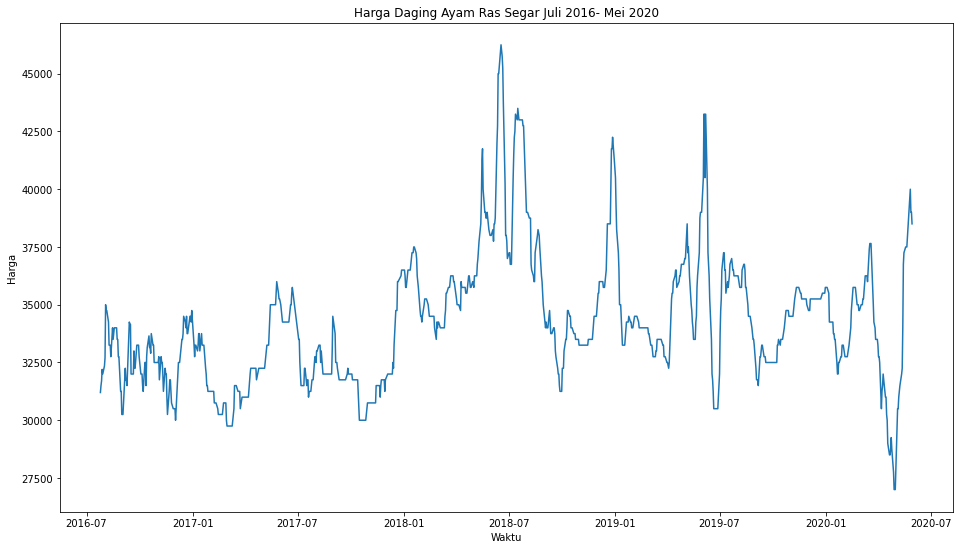

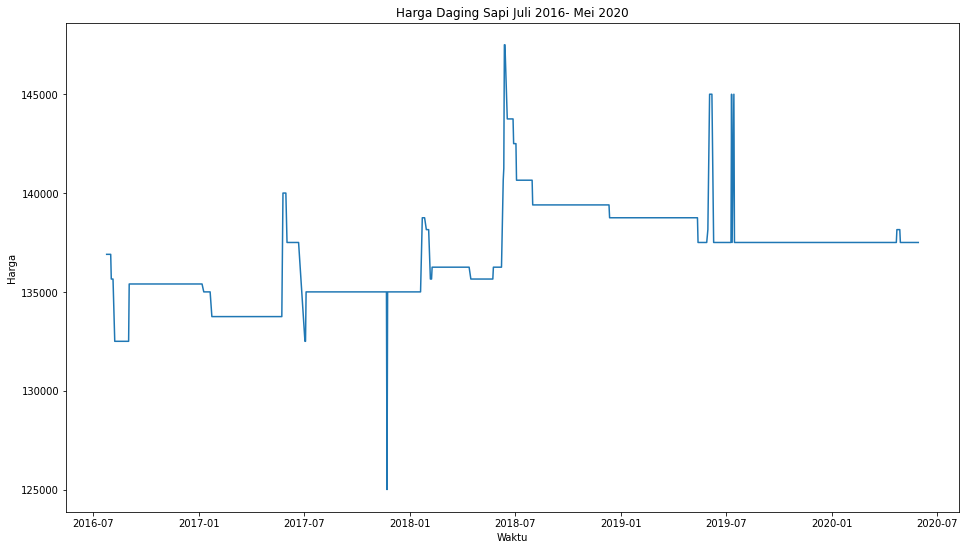

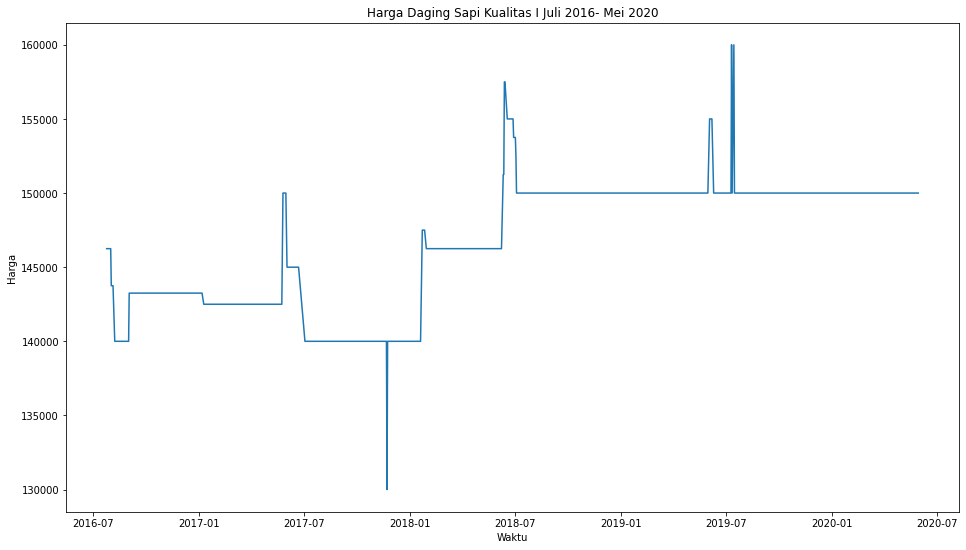

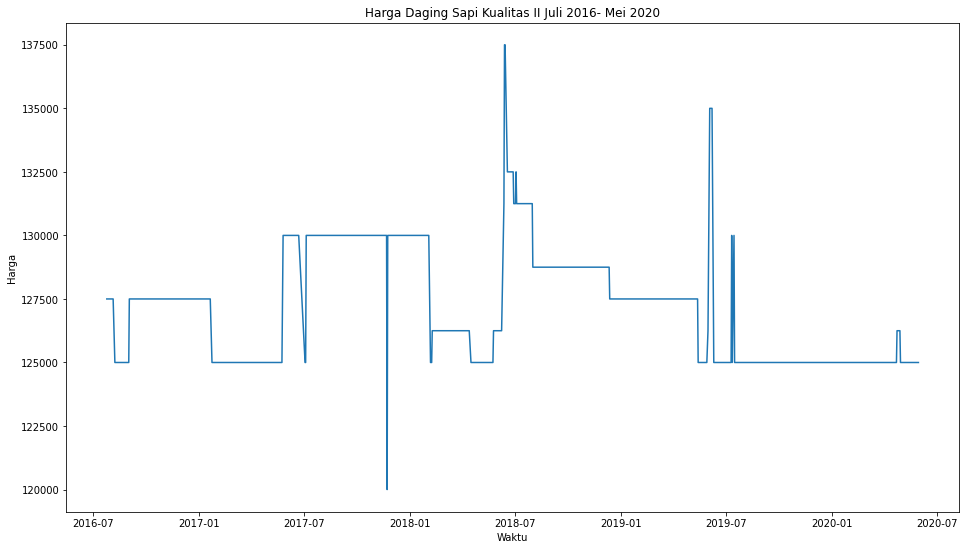

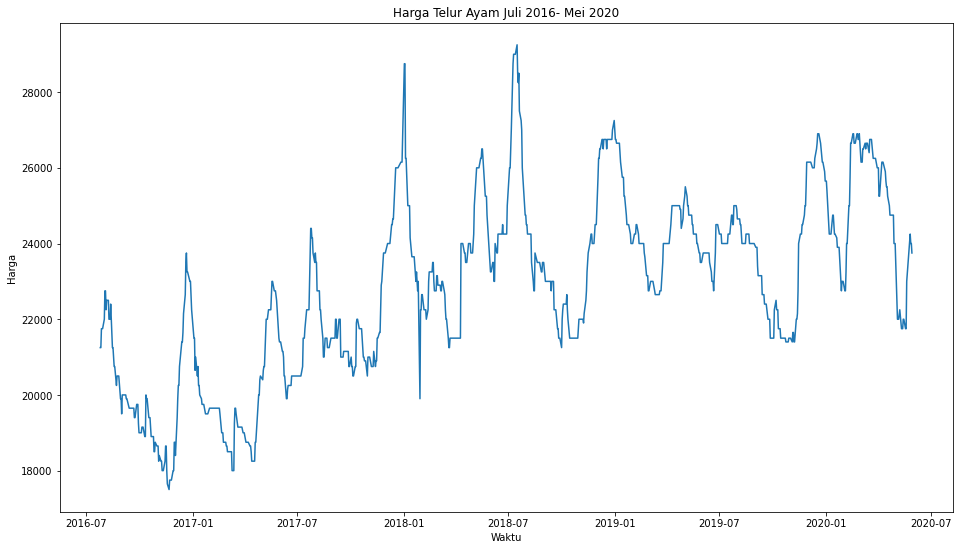

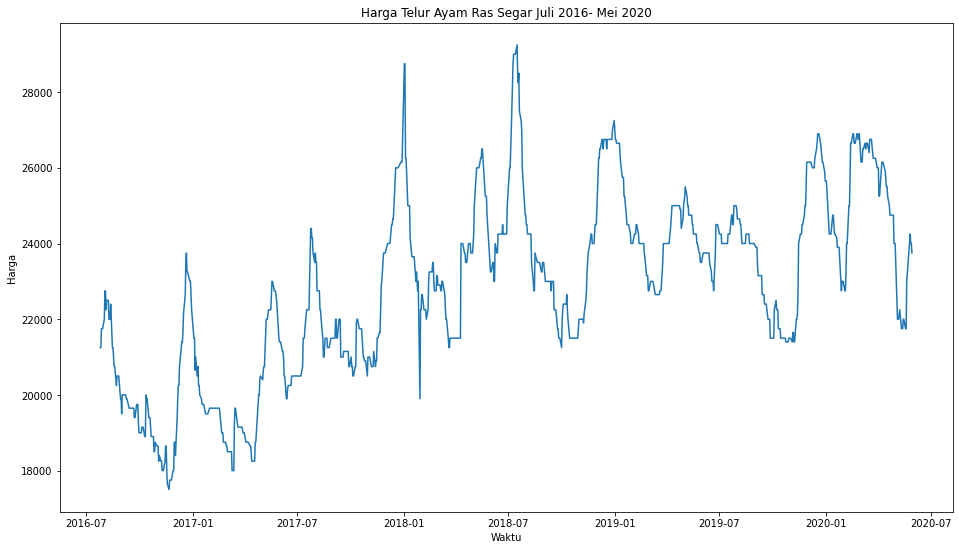

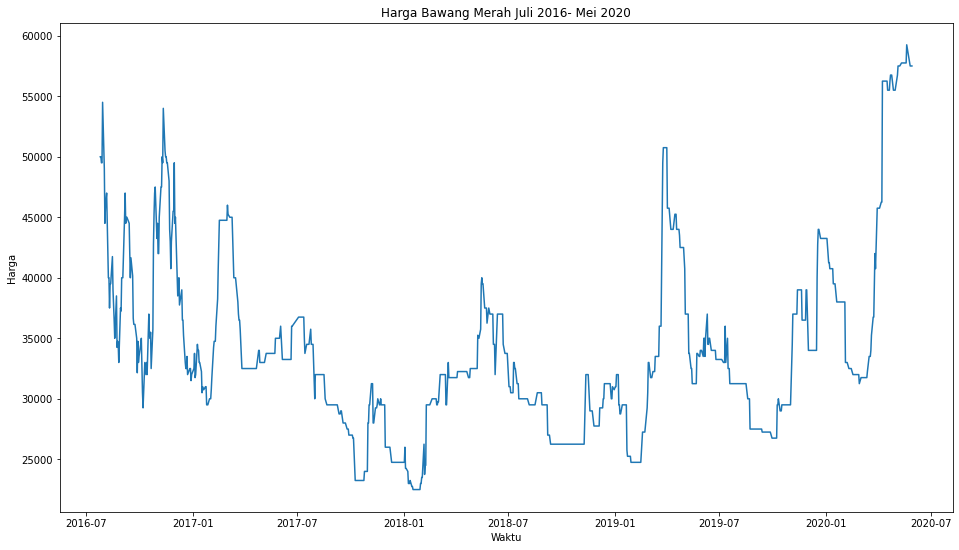

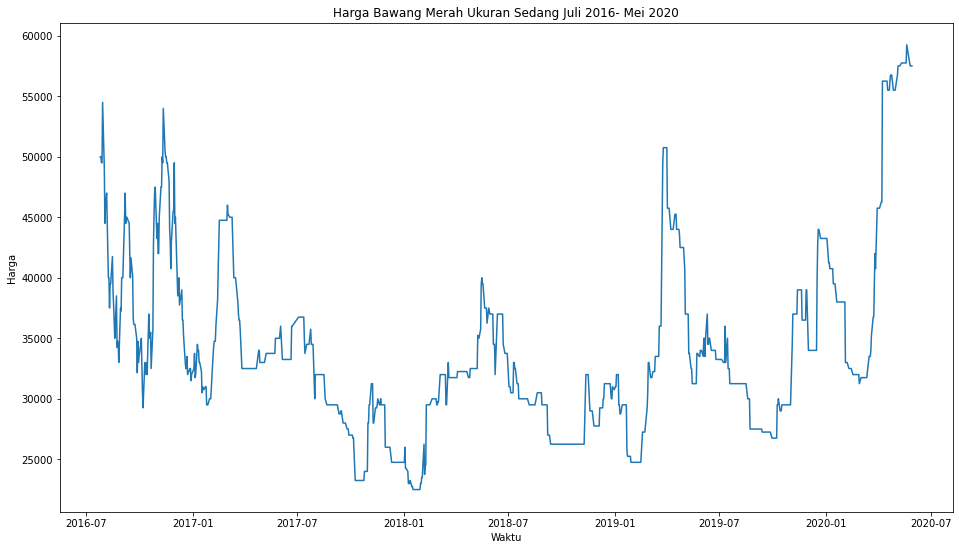

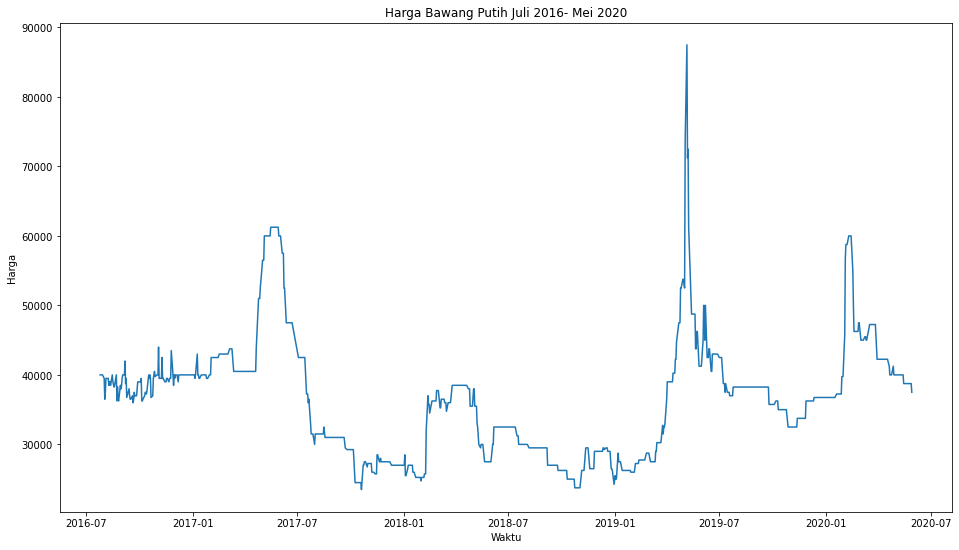

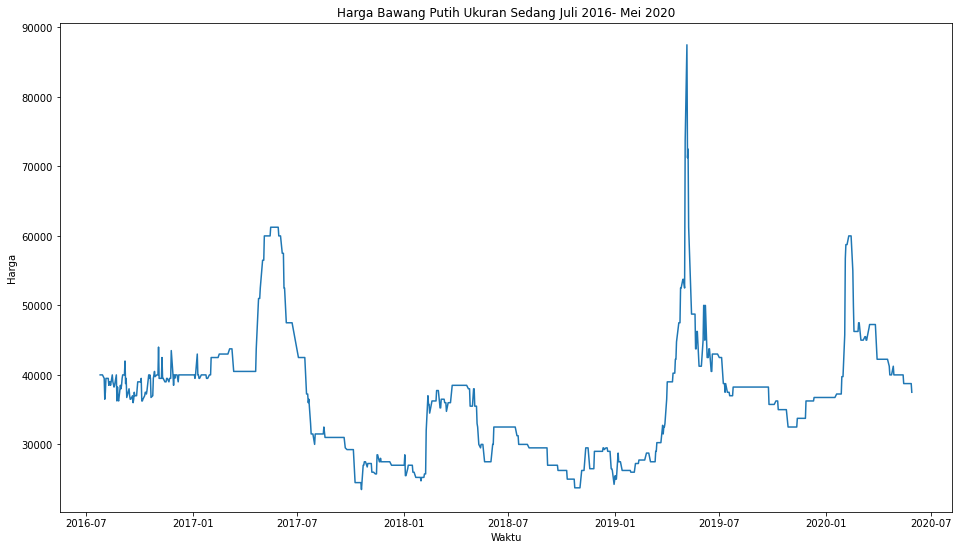

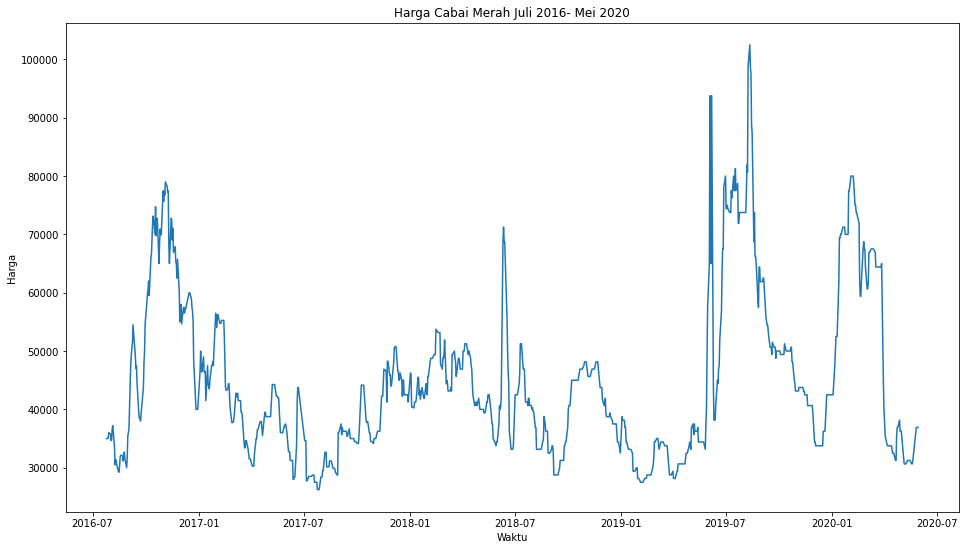

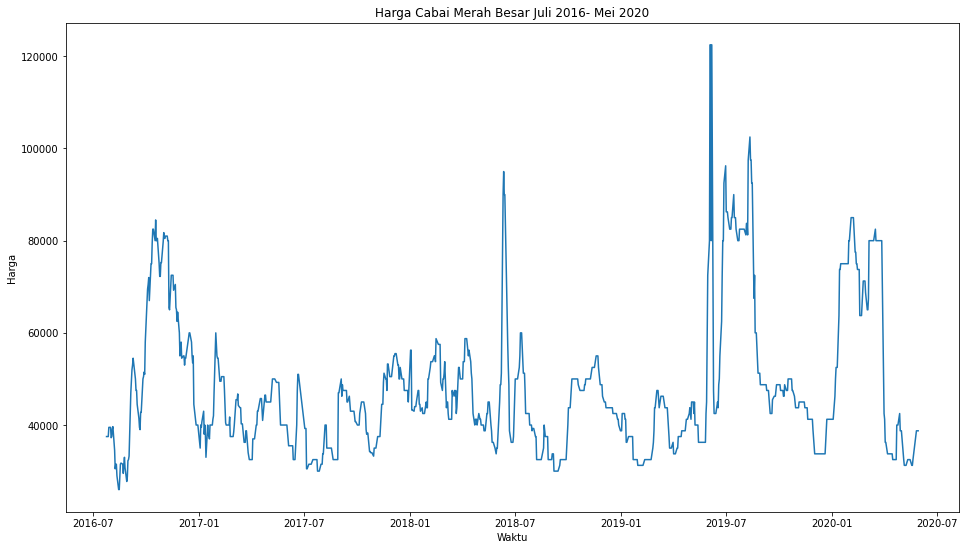

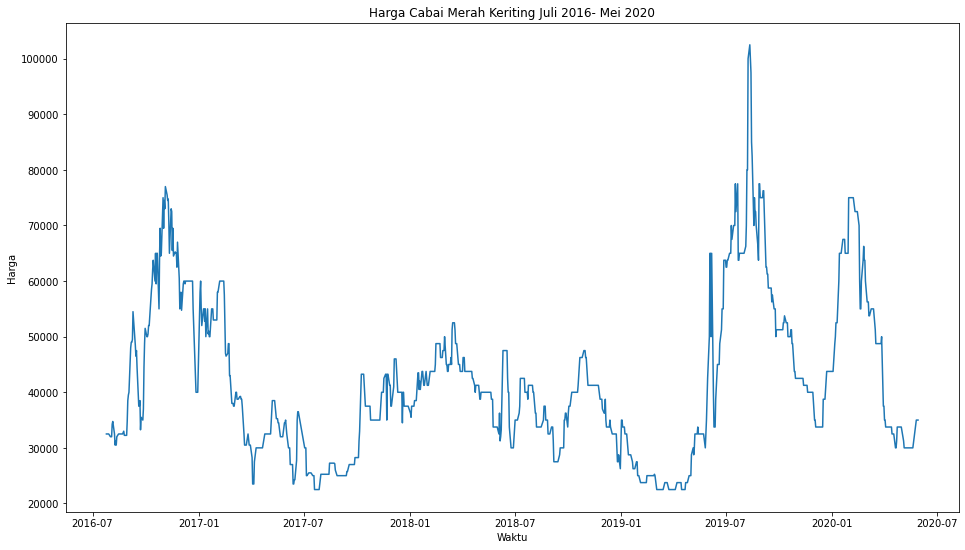

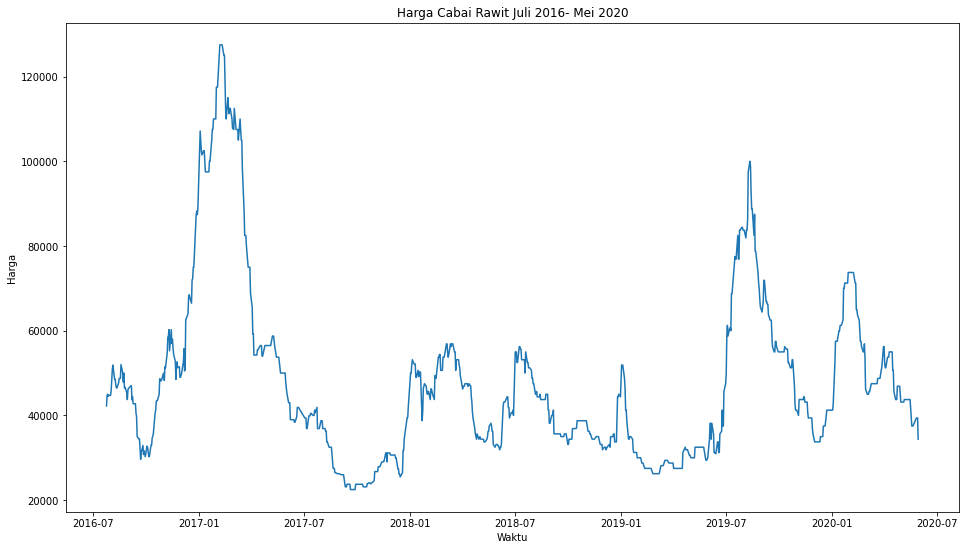

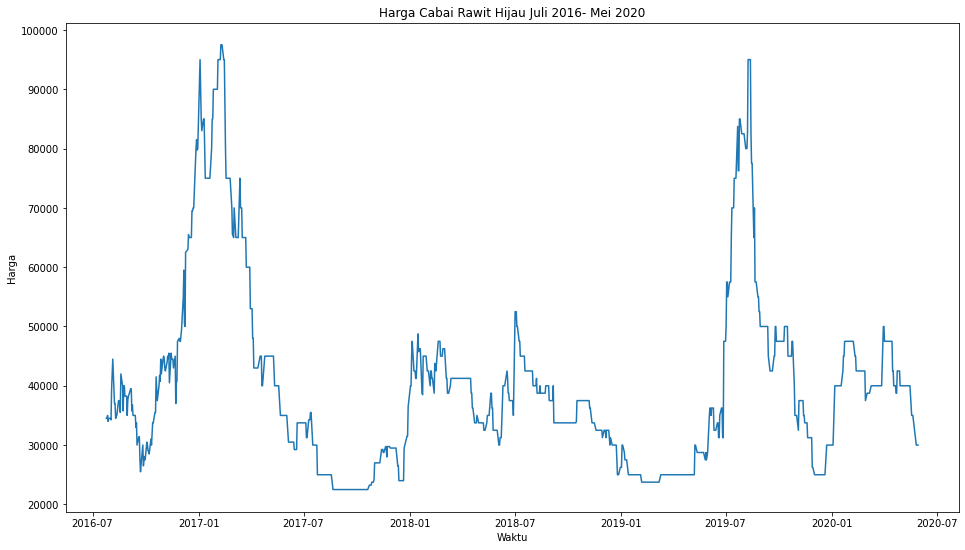

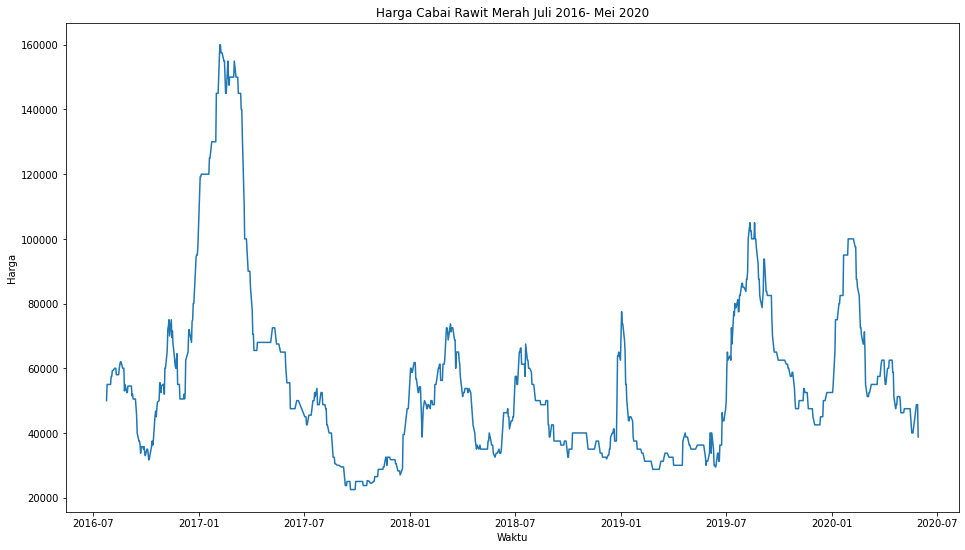

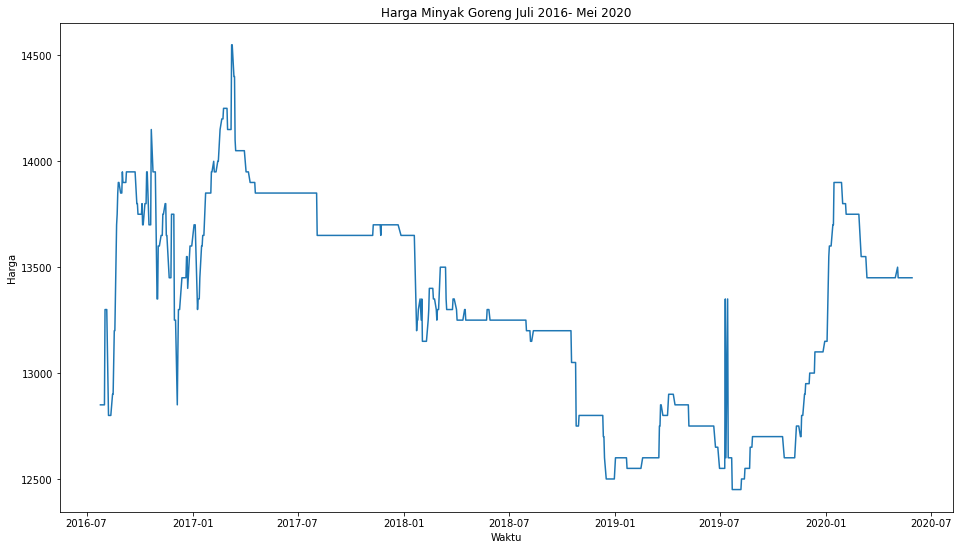

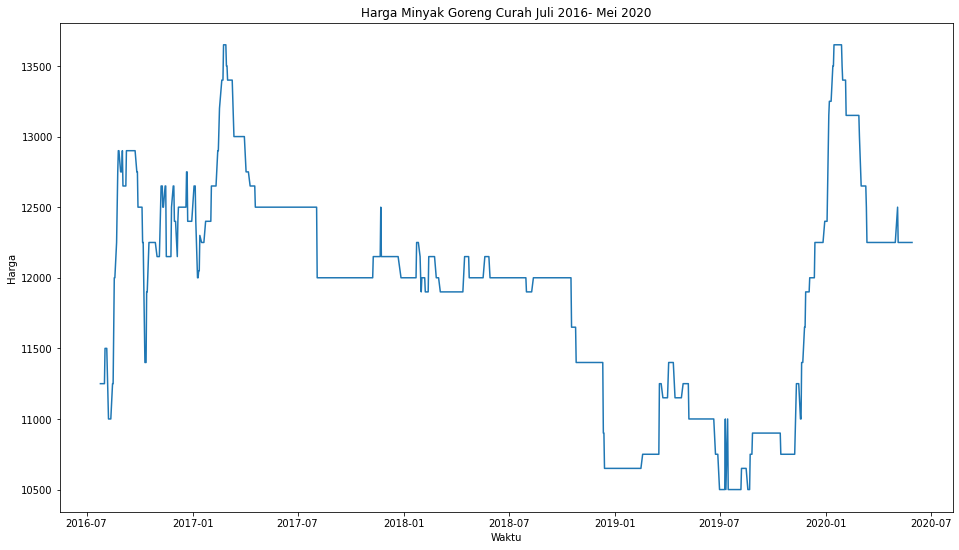

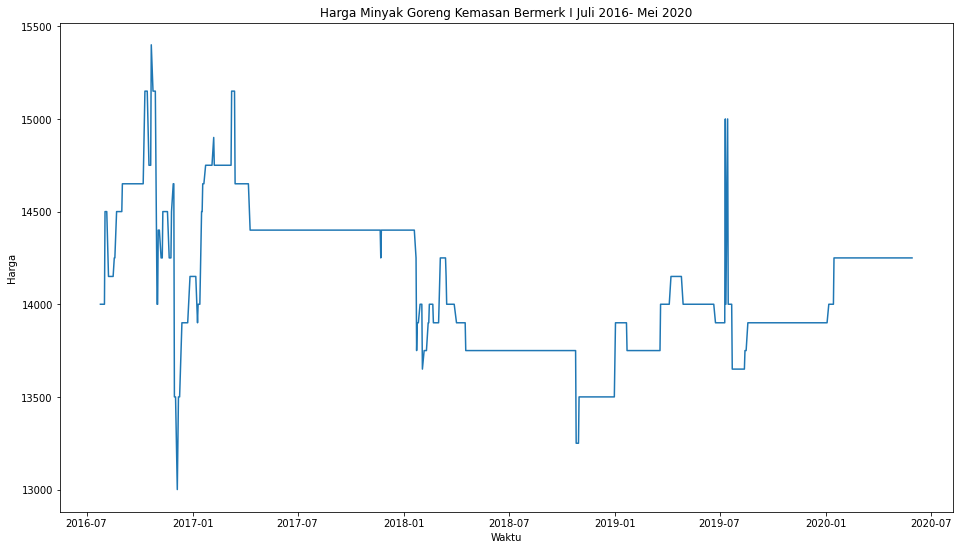

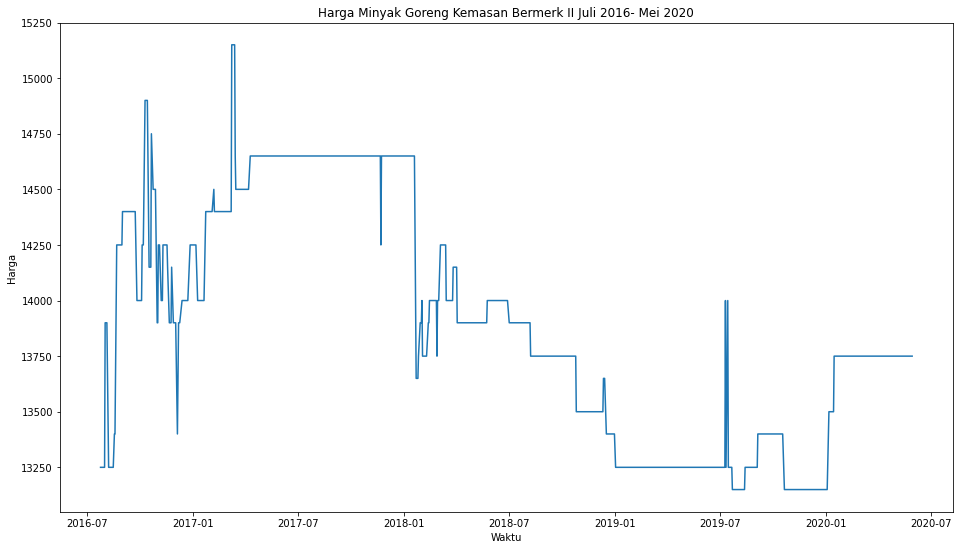

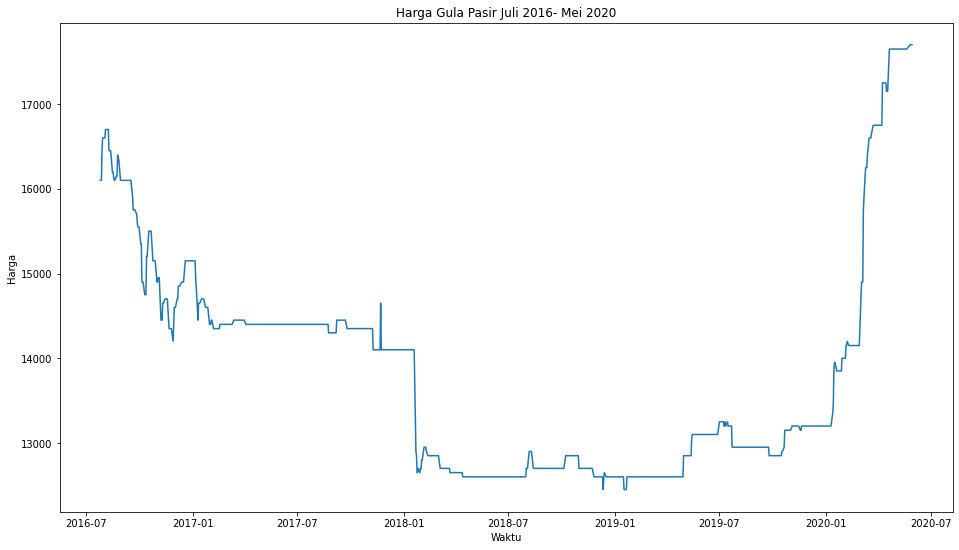

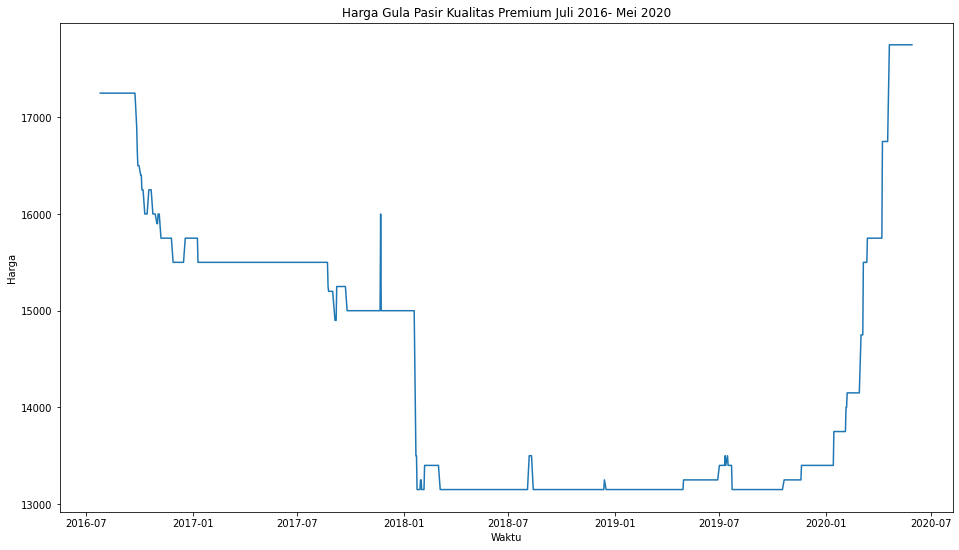

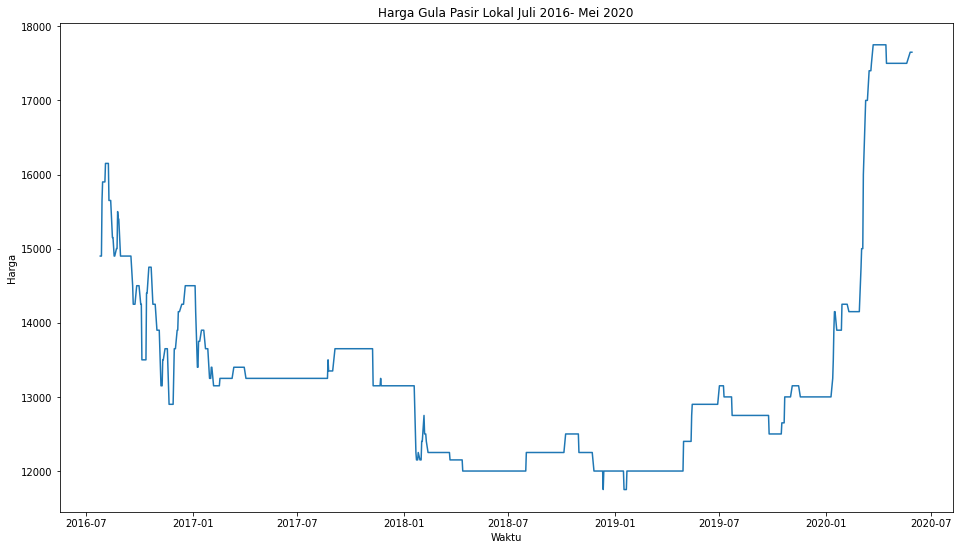

In [32]:
show_per_commodity(dataset)